In [33]:
import tensorflow as tf
device = tf.config.list_physical_devices('GPU')
# tf.config.experimental.set_memory_growth(device[6],True)
gpus = tf.config.list_physical_devices('GPU')
for i in range(len(gpus)):
	tf.config.experimental.set_memory_growth(device[i], True)
# tf.debugging.set_log_device_placement(True)

device
# a = tf.config.set
# tf.config.set_visible_devices(device[7], 'GPU')

RuntimeError: ignored

In [34]:
import numpy as np
import os

In [38]:
#  actions, data
file_root = 'dataset/'
file_list = os.listdir(file_root)
actions = np.load(file_root+'labels.npy')
print(file_list)
print(actions)

['seq_훈련.npy', 'seq_수학.npy', 'seq_석사.npy', 'seq_공부.npy', 'seq_철학.npy', 'seq_학생.npy', 'seq_대학생.npy', 'seq_기말시험.npy', 'seq_성적.npy', 'seq_중학생.npy', 'seq_연구.npy', 'seq_도서관.npy', 'seq_복습.npy', 'seq_연수.npy', 'seq_대학교.npy', 'seq_교육자.npy', '.ipynb_checkpoints', 'seq_가위.npy', 'seq_강당.npy', 'seq_서점.npy', 'seq_학과.npy', 'seq_중학교.npy', 'seq_지각.npy', 'seq_초등학교.npy', 'seq_기숙사.npy', 'seq_실습.npy', 'seq_합격.npy', 'seq_대학원.npy', 'seq_세미나.npy', 'seq_고등학생.npy', 'seq_졸업.npy', 'seq_배우다.npy', 'seq_실험.npy', 'seq_학교.npy', 'seq_제자.npy', 'seq_필기.npy', 'seq_교실.npy', 'seq_과학.npy', 'seq_가르치다.npy', 'seq_유치원.npy', 'seq_교무실.npy', 'seq_정답.npy', 'seq_결석.npy', 'seq_연습.npy', 'seq_볼펜.npy', 'seq_입학.npy', 'seq_상장.npy', 'labels.npy', 'seq_박사.npy', 'seq_총장.npy', 'seq_연구실.npy', 'seq_맹학교.npy', 'seq_초등.npy', 'seq_교육대학교.npy', 'seq_백지.npy', 'seq_과목.npy', 'seq_과.npy', 'seq_불합격.npy', 'seq_교과서.npy', 'seq_역사.npy', 'seq_고등학교.npy', 'seq_반.npy', 'seq_연구소.npy']
['백지' '대학원' '학교' '역사' '대학생' '학생' '강당' '연구실' '졸업' '초등학교' '필기' '총장' '서점'
 '교과서' '반'

In [47]:
files = []
for f in file_list:
    if f[:3] == 'seq':
        files.append(f)
len(files)

60

# 데이터 셋 구성
- 예시 (이전코드)
```python
    actions = [
        'come',
        'away',
        'spin'
    ]

    data = np.concatenate([
        np.load('dataset/seq_come_1627646273.npy'),
        np.load('dataset/seq_away_1627646273.npy'),
        np.load('dataset/seq_spin_1627646273.npy')
    ], axis=0)

    data.shape
```

In [ ]:
# actions = [f[4:-4] for f in file_list]
# actions

In [48]:
print(files)
# file_list.pop(46)
data = np.concatenate([np.load(file_root+f) for f in files], axis=0)
data
# idx= 0
# for f in file_list:
#     print(f'{idx}번째 : file name is {f} - {np.load(file_root+f).shape}')
#     idx += 1

['seq_훈련.npy', 'seq_수학.npy', 'seq_석사.npy', 'seq_공부.npy', 'seq_철학.npy', 'seq_학생.npy', 'seq_대학생.npy', 'seq_기말시험.npy', 'seq_성적.npy', 'seq_중학생.npy', 'seq_연구.npy', 'seq_도서관.npy', 'seq_복습.npy', 'seq_연수.npy', 'seq_대학교.npy', 'seq_교육자.npy', 'seq_가위.npy', 'seq_강당.npy', 'seq_서점.npy', 'seq_학과.npy', 'seq_중학교.npy', 'seq_지각.npy', 'seq_초등학교.npy', 'seq_기숙사.npy', 'seq_실습.npy', 'seq_합격.npy', 'seq_대학원.npy', 'seq_세미나.npy', 'seq_고등학생.npy', 'seq_졸업.npy', 'seq_배우다.npy', 'seq_실험.npy', 'seq_학교.npy', 'seq_제자.npy', 'seq_필기.npy', 'seq_교실.npy', 'seq_과학.npy', 'seq_가르치다.npy', 'seq_유치원.npy', 'seq_교무실.npy', 'seq_정답.npy', 'seq_결석.npy', 'seq_연습.npy', 'seq_볼펜.npy', 'seq_입학.npy', 'seq_박사.npy', 'seq_총장.npy', 'seq_연구실.npy', 'seq_맹학교.npy', 'seq_초등.npy', 'seq_교육대학교.npy', 'seq_백지.npy', 'seq_과목.npy', 'seq_과.npy', 'seq_불합격.npy', 'seq_교과서.npy', 'seq_역사.npy', 'seq_고등학교.npy', 'seq_반.npy', 'seq_연구소.npy']


array([[ 3.87588024e-01,  8.47547472e-01,  1.59006362e-07, ...,
         7.56875000e+01,  1.61750000e+02,  2.30000000e+01],
       [ 3.89701843e-01,  8.44507396e-01,  1.16889325e-07, ...,
         7.38125000e+01,  1.60125000e+02,  2.30000000e+01],
       [ 3.91044587e-01,  8.22403848e-01,  1.72383707e-07, ...,
         6.93750000e+01,  1.62125000e+02,  2.30000000e+01],
       ...,
       [ 3.83886606e-01,  5.56780398e-01, -2.36012639e-07, ...,
         7.61250000e+01,  1.71500000e+02,  4.70000000e+01],
       [ 3.84039342e-01,  5.59170187e-01, -2.42582814e-07, ...,
         7.61250000e+01,  1.71500000e+02,  4.70000000e+01],
       [ 3.59728426e-01,  5.63107252e-01, -3.27023855e-07, ...,
         7.50000000e+01,  1.71625000e+02,  4.70000000e+01]])

In [49]:
data.shape

(1943, 266)

In [50]:
x_data = data[:, :-1]
labels = data[:, -1]

print(x_data.shape)
print(labels.shape)
# print(*labels)
print(len(actions))

(1943, 265)
(1943,)
61


# 데이터 입력 전처리
- 예시 (이전코드)
```python
    x_data = data[:, :, :-1]
    labels = data[:, 0, -1]

    print(x_data.shape)
    print(labels.shape)
```

In [51]:
from tensorflow.keras.utils import to_categorical

y_data = to_categorical(labels, num_classes=len(actions))
y_data.shape

(1943, 61)

In [52]:
time_stamp = 1
x_data = x_data.astype(np.float32)
y_train = y_data.astype(np.float32)
x_train = x_data.reshape(int(len(x_data)/time_stamp), time_stamp, 265)
# y_train = y_data.reshape(int(len(y_data)/time_stamp), time_stamp, 61)

print(x_train.shape, y_train.shape)

(1943, 1, 265) (1943, 61)


In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


model = Sequential([
    LSTM(64, activation='relu', input_shape=x_train.shape[1:3]),
    Dense(32, activation='relu'),
    Dense(len(actions), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                84480     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 61)                2013      
                                                                 
Total params: 88573 (345.99 KB)
Trainable params: 88573 (345.99 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

# history = model.fit(
#     x_train,
#     y_train,
# #     validation_data=(x_val, y_val),
#     epochs=200,
#     callbacks=[
#         ModelCheckpoint('models/model.h5', monitor='val_acc', verbose=1, save_best_only=True, mode='auto'),
#         ReduceLROnPlateau(monitor='val_acc', factor=0.5, patience=50, verbose=1, mode='auto')
#     ]
# )

In [54]:
# from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

# history = model.fit(
#     x_train,
#     y_train,
#     epochs=10,
#     callbacks=[
#         ModelCheckpoint('models/sl_model.h5', monitor='val_acc', verbose=1, save_best_only=True, mode='auto'),
# #         ReduceLROnPlateau(monitor='val_acc', factor=0.5, patience=50, verbose=1, mode='auto')
#     ]
# )

Epoch 1/10
58/61 [===========================>..] - ETA: 0s - loss: 4.0526 - acc: 0.0765

61/61 [==============================] - 3s 6ms/step - loss: 4.0357 - acc: 0.0772
Epoch 2/10
60/61 [============================>.] - ETA: 0s - loss: 3.3571 - acc: 0.1688

61/61 [==============================] - 0s 7ms/step - loss: 3.3524 - acc: 0.1698
Epoch 3/10
59/61 [============================>.] - ETA: 0s - loss: 2.9331 - acc: 0.2654

61/61 [==============================] - 1s 10ms/step - loss: 2.9329 - acc: 0.2651
Epoch 4/10
59/61 [============================>.] - ETA: 0s - loss: 2.5691 - acc: 0.3517

61/61 [==============================] - 1s 10ms/step - loss: 2.5634 - acc: 0.3520
Epoch 5/10
18/61 [=======>......................] - ETA: 0s - loss: 2.3443 - acc: 0.3837

KeyboardInterrupt: ignored

In [55]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

history = model.fit(
    x_train,
    y_train,
    epochs=200,
    callbacks=[
        ModelCheckpoint('models/sl_model_1.h5', monitor='val_acc', verbose=1, save_best_only=True, mode='auto'),
        ReduceLROnPlateau(monitor='val_acc', factor=0.5, patience=50, verbose=1, mode='auto')
    ]
)

Epoch 1/200
56/61 [==========================>...] - ETA: 0s - loss: 2.2546 - acc: 0.4135

61/61 [==============================] - 0s 6ms/step - loss: 2.2518 - acc: 0.4092 - lr: 0.0010
Epoch 2/200
55/61 [==========================>...] - ETA: 0s - loss: 2.0940 - acc: 0.4358

61/61 [==============================] - 0s 6ms/step - loss: 2.1018 - acc: 0.4359 - lr: 0.0010
Epoch 3/200
61/61 [==============================] - ETA: 0s - loss: 2.0025 - acc: 0.4575

61/61 [==============================] - 0s 6ms/step - loss: 2.0025 - acc: 0.4575 - lr: 0.0010
Epoch 4/200
61/61 [==============================] - ETA: 0s - loss: 1.9153 - acc: 0.4802

61/61 [==============================] - 0s 6ms/step - loss: 1.9153 - acc: 0.4802 - lr: 0.0010
Epoch 5/200
56/61 [==========================>...] - ETA: 0s - loss: 1.7732 - acc: 0.5084

61/61 [==============================] - 0s 6ms/step - loss: 1.7935 - acc: 0.5008 - lr: 0.0010
Epoch 6/200
54/61 [=========================>....] - ETA: 0s - loss: 1.7359 - acc: 0.5127

61/61 [==============================] - 0s 6ms/step - loss: 1.7260 - acc: 0.5152 - lr: 0.0010
Epoch 7/200
59/61 [============================>.] - ETA: 0s - loss: 1.6464 - acc: 0.5371

61/61 [==============================] - 0s 7ms/step - loss: 1.6399 - acc: 0.5404 - lr: 0.0010
Epoch 8/200
56/61 [==========================>...] - ETA: 0s - loss: 1.5615 - acc: 0.5592

61/61 [==============================] - 0s 6ms/step - loss: 1.5485 - acc: 0.5589 - lr: 0.0010
Epoch 9/200
58/61 [===========================>..] - ETA: 0s - loss: 1.5109 - acc: 0.5711

61/61 [==============================] - 0s 6ms/step - loss: 1.5043 - acc: 0.5713 - lr: 0.0010
Epoch 10/200
57/61 [===========================>..] - ETA: 0s - loss: 1.4562 - acc: 0.5784

61/61 [==============================] - 0s 6ms/step - loss: 1.4644 - acc: 0.5769 - lr: 0.0010
Epoch 11/200
53/61 [=========================>....] - ETA: 0s - loss: 1.4311 - acc: 0.5938

61/61 [==============================] - 0s 6ms/step - loss: 1.4332 - acc: 0.5970 - lr: 0.0010
Epoch 12/200
61/61 [==============================] - ETA: 0s - loss: 1.3610 - acc: 0.6052

61/61 [==============================] - 0s 6ms/step - loss: 1.3610 - acc: 0.6052 - lr: 0.0010
Epoch 13/200
53/61 [=========================>....] - ETA: 0s - loss: 1.2735 - acc: 0.6321

61/61 [==============================] - 0s 6ms/step - loss: 1.3052 - acc: 0.6269 - lr: 0.0010
Epoch 14/200
54/61 [=========================>....] - ETA: 0s - loss: 1.2891 - acc: 0.6186

61/61 [==============================] - 0s 6ms/step - loss: 1.2877 - acc: 0.6176 - lr: 0.0010
Epoch 15/200
56/61 [==========================>...] - ETA: 0s - loss: 1.2383 - acc: 0.6434

61/61 [==============================] - 0s 6ms/step - loss: 1.2366 - acc: 0.6454 - lr: 0.0010
Epoch 16/200
61/61 [==============================] - ETA: 0s - loss: 1.2633 - acc: 0.6413

61/61 [==============================] - 0s 6ms/step - loss: 1.2633 - acc: 0.6413 - lr: 0.0010
Epoch 17/200
57/61 [===========================>..] - ETA: 0s - loss: 1.1868 - acc: 0.6497

61/61 [==============================] - 0s 6ms/step - loss: 1.1854 - acc: 0.6490 - lr: 0.0010
Epoch 18/200
53/61 [=========================>....] - ETA: 0s - loss: 1.1261 - acc: 0.6769

61/61 [==============================] - 0s 6ms/step - loss: 1.1413 - acc: 0.6711 - lr: 0.0010
Epoch 19/200
55/61 [==========================>...] - ETA: 0s - loss: 1.1172 - acc: 0.6841

61/61 [==============================] - 0s 6ms/step - loss: 1.1235 - acc: 0.6804 - lr: 0.0010
Epoch 20/200
61/61 [==============================] - ETA: 0s - loss: 1.0822 - acc: 0.6809

61/61 [==============================] - 0s 7ms/step - loss: 1.0822 - acc: 0.6809 - lr: 0.0010
Epoch 21/200
55/61 [==========================>...] - ETA: 0s - loss: 1.0611 - acc: 0.6830

61/61 [==============================] - 0s 6ms/step - loss: 1.0727 - acc: 0.6814 - lr: 0.0010
Epoch 22/200
58/61 [===========================>..] - ETA: 0s - loss: 1.0424 - acc: 0.6918

61/61 [==============================] - 1s 10ms/step - loss: 1.0365 - acc: 0.6917 - lr: 0.0010
Epoch 23/200
60/61 [============================>.] - ETA: 0s - loss: 0.9986 - acc: 0.7094

61/61 [==============================] - 1s 11ms/step - loss: 0.9988 - acc: 0.7097 - lr: 0.0010
Epoch 24/200
57/61 [===========================>..] - ETA: 0s - loss: 0.9867 - acc: 0.6990

61/61 [==============================] - 1s 11ms/step - loss: 0.9930 - acc: 0.6984 - lr: 0.0010
Epoch 25/200
55/61 [==========================>...] - ETA: 0s - loss: 0.9812 - acc: 0.7085

61/61 [==============================] - 1s 9ms/step - loss: 0.9691 - acc: 0.7102 - lr: 0.0010
Epoch 26/200
59/61 [============================>.] - ETA: 0s - loss: 0.9977 - acc: 0.7076

61/61 [==============================] - 0s 6ms/step - loss: 0.9952 - acc: 0.7082 - lr: 0.0010
Epoch 27/200
55/61 [==========================>...] - ETA: 0s - loss: 0.9276 - acc: 0.7256

61/61 [==============================] - 0s 6ms/step - loss: 0.9426 - acc: 0.7210 - lr: 0.0010
Epoch 28/200
58/61 [===========================>..] - ETA: 0s - loss: 0.9174 - acc: 0.7398

61/61 [==============================] - 0s 6ms/step - loss: 0.9203 - acc: 0.7406 - lr: 0.0010
Epoch 29/200
55/61 [==========================>...] - ETA: 0s - loss: 0.9153 - acc: 0.7295

61/61 [==============================] - 0s 6ms/step - loss: 0.9120 - acc: 0.7324 - lr: 0.0010
Epoch 30/200
54/61 [=========================>....] - ETA: 0s - loss: 0.8924 - acc: 0.7274

61/61 [==============================] - 0s 6ms/step - loss: 0.8740 - acc: 0.7277 - lr: 0.0010
Epoch 31/200
55/61 [==========================>...] - ETA: 0s - loss: 0.8347 - acc: 0.7477

61/61 [==============================] - 0s 6ms/step - loss: 0.8412 - acc: 0.7458 - lr: 0.0010
Epoch 32/200
57/61 [===========================>..] - ETA: 0s - loss: 0.8711 - acc: 0.7385

61/61 [==============================] - 0s 6ms/step - loss: 0.8709 - acc: 0.7360 - lr: 0.0010
Epoch 33/200
55/61 [==========================>...] - ETA: 0s - loss: 0.7989 - acc: 0.7580

61/61 [==============================] - 0s 6ms/step - loss: 0.8003 - acc: 0.7586 - lr: 0.0010
Epoch 34/200
57/61 [===========================>..] - ETA: 0s - loss: 0.7978 - acc: 0.7582

61/61 [==============================] - 0s 6ms/step - loss: 0.7927 - acc: 0.7586 - lr: 0.0010
Epoch 35/200
61/61 [==============================] - ETA: 0s - loss: 0.8161 - acc: 0.7560

61/61 [==============================] - 0s 6ms/step - loss: 0.8161 - acc: 0.7560 - lr: 0.0010
Epoch 36/200
57/61 [===========================>..] - ETA: 0s - loss: 0.8000 - acc: 0.7533

61/61 [==============================] - 0s 6ms/step - loss: 0.7954 - acc: 0.7555 - lr: 0.0010
Epoch 37/200
56/61 [==========================>...] - ETA: 0s - loss: 0.7962 - acc: 0.7533

61/61 [==============================] - 0s 6ms/step - loss: 0.7964 - acc: 0.7530 - lr: 0.0010
Epoch 38/200
60/61 [============================>.] - ETA: 0s - loss: 0.8004 - acc: 0.7594

61/61 [==============================] - 0s 6ms/step - loss: 0.7993 - acc: 0.7591 - lr: 0.0010
Epoch 39/200
53/61 [=========================>....] - ETA: 0s - loss: 0.7971 - acc: 0.7630

61/61 [==============================] - 0s 6ms/step - loss: 0.7749 - acc: 0.7669 - lr: 0.0010
Epoch 40/200
58/61 [===========================>..] - ETA: 0s - loss: 0.7221 - acc: 0.7812

61/61 [==============================] - 0s 6ms/step - loss: 0.7254 - acc: 0.7813 - lr: 0.0010
Epoch 41/200
52/61 [========================>.....] - ETA: 0s - loss: 0.6938 - acc: 0.7873

61/61 [==============================] - 0s 6ms/step - loss: 0.7134 - acc: 0.7792 - lr: 0.0010
Epoch 42/200
55/61 [==========================>...] - ETA: 0s - loss: 0.7175 - acc: 0.7790

61/61 [==============================] - 0s 6ms/step - loss: 0.7217 - acc: 0.7777 - lr: 0.0010
Epoch 43/200
57/61 [===========================>..] - ETA: 0s - loss: 0.7400 - acc: 0.7681

61/61 [==============================] - 0s 7ms/step - loss: 0.7406 - acc: 0.7674 - lr: 0.0010
Epoch 44/200
53/61 [=========================>....] - ETA: 0s - loss: 0.7034 - acc: 0.7848

61/61 [==============================] - 0s 6ms/step - loss: 0.7040 - acc: 0.7833 - lr: 0.0010
Epoch 45/200
53/61 [=========================>....] - ETA: 0s - loss: 0.7256 - acc: 0.7812

61/61 [==============================] - 0s 6ms/step - loss: 0.7100 - acc: 0.7859 - lr: 0.0010
Epoch 46/200
58/61 [===========================>..] - ETA: 0s - loss: 0.6546 - acc: 0.7963

61/61 [==============================] - 0s 7ms/step - loss: 0.6531 - acc: 0.7957 - lr: 0.0010
Epoch 47/200
59/61 [============================>.] - ETA: 0s - loss: 0.6361 - acc: 0.7993

61/61 [==============================] - 0s 7ms/step - loss: 0.6356 - acc: 0.7998 - lr: 0.0010
Epoch 48/200
61/61 [==============================] - ETA: 0s - loss: 0.6298 - acc: 0.8137

61/61 [==============================] - 0s 6ms/step - loss: 0.6298 - acc: 0.8137 - lr: 0.0010
Epoch 49/200
57/61 [===========================>..] - ETA: 0s - loss: 0.6449 - acc: 0.7961

61/61 [==============================] - 0s 6ms/step - loss: 0.6508 - acc: 0.7946 - lr: 0.0010
Epoch 50/200
57/61 [===========================>..] - ETA: 0s - loss: 0.6154 - acc: 0.8109

61/61 [==============================] - 0s 6ms/step - loss: 0.6212 - acc: 0.8106 - lr: 0.0010
Epoch 51/200
60/61 [============================>.] - ETA: 0s - loss: 0.6428 - acc: 0.8010

61/61 [==============================] - 0s 6ms/step - loss: 0.6428 - acc: 0.8013 - lr: 0.0010
Epoch 52/200
60/61 [============================>.] - ETA: 0s - loss: 0.6110 - acc: 0.8177

61/61 [==============================] - 1s 10ms/step - loss: 0.6153 - acc: 0.8157 - lr: 0.0010
Epoch 53/200
60/61 [============================>.] - ETA: 0s - loss: 0.6015 - acc: 0.8146

61/61 [==============================] - 1s 11ms/step - loss: 0.6021 - acc: 0.8152 - lr: 0.0010
Epoch 54/200
61/61 [==============================] - ETA: 0s - loss: 0.5908 - acc: 0.8142

61/61 [==============================] - 1s 13ms/step - loss: 0.5908 - acc: 0.8142 - lr: 0.0010
Epoch 55/200
60/61 [============================>.] - ETA: 0s - loss: 0.5957 - acc: 0.8078

61/61 [==============================] - 1s 12ms/step - loss: 0.5961 - acc: 0.8075 - lr: 0.0010
Epoch 56/200
61/61 [==============================] - ETA: 0s - loss: 0.5846 - acc: 0.8194

61/61 [==============================] - 1s 11ms/step - loss: 0.5846 - acc: 0.8194 - lr: 0.0010
Epoch 57/200
58/61 [===========================>..] - ETA: 0s - loss: 0.5953 - acc: 0.8206

61/61 [==============================] - 1s 10ms/step - loss: 0.6041 - acc: 0.8178 - lr: 0.0010
Epoch 58/200
61/61 [==============================] - ETA: 0s - loss: 0.5941 - acc: 0.8085

61/61 [==============================] - 0s 6ms/step - loss: 0.5941 - acc: 0.8085 - lr: 0.0010
Epoch 59/200
61/61 [==============================] - ETA: 0s - loss: 0.5694 - acc: 0.8271

61/61 [==============================] - 0s 6ms/step - loss: 0.5694 - acc: 0.8271 - lr: 0.0010
Epoch 60/200
56/61 [==========================>...] - ETA: 0s - loss: 0.5290 - acc: 0.8348

61/61 [==============================] - 0s 6ms/step - loss: 0.5290 - acc: 0.8369 - lr: 0.0010
Epoch 61/200
54/61 [=========================>....] - ETA: 0s - loss: 0.5626 - acc: 0.8281

61/61 [==============================] - 0s 6ms/step - loss: 0.5723 - acc: 0.8281 - lr: 0.0010
Epoch 62/200
54/61 [=========================>....] - ETA: 0s - loss: 0.5601 - acc: 0.8218

61/61 [==============================] - 0s 6ms/step - loss: 0.5577 - acc: 0.8240 - lr: 0.0010
Epoch 63/200
56/61 [==========================>...] - ETA: 0s - loss: 0.5116 - acc: 0.8354

61/61 [==============================] - 0s 6ms/step - loss: 0.5102 - acc: 0.8353 - lr: 0.0010
Epoch 64/200
60/61 [============================>.] - ETA: 0s - loss: 0.5058 - acc: 0.8401

61/61 [==============================] - 0s 6ms/step - loss: 0.5083 - acc: 0.8399 - lr: 0.0010
Epoch 65/200
56/61 [==========================>...] - ETA: 0s - loss: 0.4976 - acc: 0.8454

61/61 [==============================] - 0s 6ms/step - loss: 0.4930 - acc: 0.8441 - lr: 0.0010
Epoch 66/200
59/61 [============================>.] - ETA: 0s - loss: 0.5438 - acc: 0.8326

61/61 [==============================] - 0s 7ms/step - loss: 0.5428 - acc: 0.8332 - lr: 0.0010
Epoch 67/200
56/61 [==========================>...] - ETA: 0s - loss: 0.5453 - acc: 0.8292

61/61 [==============================] - 0s 6ms/step - loss: 0.5414 - acc: 0.8296 - lr: 0.0010
Epoch 68/200
54/61 [=========================>....] - ETA: 0s - loss: 0.5091 - acc: 0.8385

61/61 [==============================] - 0s 6ms/step - loss: 0.5059 - acc: 0.8394 - lr: 0.0010
Epoch 69/200
58/61 [===========================>..] - ETA: 0s - loss: 0.4636 - acc: 0.8508

61/61 [==============================] - 0s 7ms/step - loss: 0.4710 - acc: 0.8466 - lr: 0.0010
Epoch 70/200
53/61 [=========================>....] - ETA: 0s - loss: 0.4522 - acc: 0.8603

61/61 [==============================] - 0s 6ms/step - loss: 0.4572 - acc: 0.8569 - lr: 0.0010
Epoch 71/200
56/61 [==========================>...] - ETA: 0s - loss: 0.4716 - acc: 0.8499

61/61 [==============================] - 0s 6ms/step - loss: 0.4534 - acc: 0.8569 - lr: 0.0010
Epoch 72/200
56/61 [==========================>...] - ETA: 0s - loss: 0.4363 - acc: 0.8644

61/61 [==============================] - 0s 6ms/step - loss: 0.4350 - acc: 0.8646 - lr: 0.0010
Epoch 73/200
55/61 [==========================>...] - ETA: 0s - loss: 0.4924 - acc: 0.8449

61/61 [==============================] - 0s 6ms/step - loss: 0.4885 - acc: 0.8477 - lr: 0.0010
Epoch 74/200
53/61 [=========================>....] - ETA: 0s - loss: 0.6171 - acc: 0.8249

61/61 [==============================] - 0s 6ms/step - loss: 0.6268 - acc: 0.8209 - lr: 0.0010
Epoch 75/200
58/61 [===========================>..] - ETA: 0s - loss: 0.5038 - acc: 0.8491

61/61 [==============================] - 0s 6ms/step - loss: 0.5030 - acc: 0.8507 - lr: 0.0010
Epoch 76/200
52/61 [========================>.....] - ETA: 0s - loss: 0.4764 - acc: 0.8570

61/61 [==============================] - 0s 6ms/step - loss: 0.4760 - acc: 0.8559 - lr: 0.0010
Epoch 77/200
53/61 [=========================>....] - ETA: 0s - loss: 0.4443 - acc: 0.8679

61/61 [==============================] - 0s 6ms/step - loss: 0.4540 - acc: 0.8641 - lr: 0.0010
Epoch 78/200
56/61 [==========================>...] - ETA: 0s - loss: 0.4319 - acc: 0.8633

61/61 [==============================] - 0s 6ms/step - loss: 0.4299 - acc: 0.8652 - lr: 0.0010
Epoch 79/200
58/61 [===========================>..] - ETA: 0s - loss: 0.4400 - acc: 0.8588

61/61 [==============================] - 0s 7ms/step - loss: 0.4364 - acc: 0.8585 - lr: 0.0010
Epoch 80/200
58/61 [===========================>..] - ETA: 0s - loss: 0.4730 - acc: 0.8454

61/61 [==============================] - 1s 11ms/step - loss: 0.4731 - acc: 0.8451 - lr: 0.0010
Epoch 81/200
58/61 [===========================>..] - ETA: 0s - loss: 0.4057 - acc: 0.8707

61/61 [==============================] - 1s 11ms/step - loss: 0.4120 - acc: 0.8698 - lr: 0.0010
Epoch 82/200
57/61 [===========================>..] - ETA: 0s - loss: 0.3838 - acc: 0.8821

61/61 [==============================] - 1s 11ms/step - loss: 0.3827 - acc: 0.8806 - lr: 0.0010
Epoch 83/200
59/61 [============================>.] - ETA: 0s - loss: 0.3757 - acc: 0.8882

61/61 [==============================] - 1s 8ms/step - loss: 0.3776 - acc: 0.8873 - lr: 0.0010
Epoch 84/200
55/61 [==========================>...] - ETA: 0s - loss: 0.4123 - acc: 0.8733

61/61 [==============================] - 0s 6ms/step - loss: 0.4078 - acc: 0.8749 - lr: 0.0010
Epoch 85/200
61/61 [==============================] - ETA: 0s - loss: 0.3655 - acc: 0.8904

61/61 [==============================] - 0s 6ms/step - loss: 0.3655 - acc: 0.8904 - lr: 0.0010
Epoch 86/200
52/61 [========================>.....] - ETA: 0s - loss: 0.3528 - acc: 0.8942

61/61 [==============================] - 0s 6ms/step - loss: 0.3620 - acc: 0.8909 - lr: 0.0010
Epoch 87/200
56/61 [==========================>...] - ETA: 0s - loss: 0.3574 - acc: 0.8834

61/61 [==============================] - 0s 6ms/step - loss: 0.3606 - acc: 0.8842 - lr: 0.0010
Epoch 88/200
57/61 [===========================>..] - ETA: 0s - loss: 0.4400 - acc: 0.8684

61/61 [==============================] - 0s 7ms/step - loss: 0.4479 - acc: 0.8646 - lr: 0.0010
Epoch 89/200
57/61 [===========================>..] - ETA: 0s - loss: 0.3810 - acc: 0.8788

61/61 [==============================] - 0s 6ms/step - loss: 0.3789 - acc: 0.8801 - lr: 0.0010
Epoch 90/200
61/61 [==============================] - ETA: 0s - loss: 0.4267 - acc: 0.8688

61/61 [==============================] - 0s 6ms/step - loss: 0.4267 - acc: 0.8688 - lr: 0.0010
Epoch 91/200
57/61 [===========================>..] - ETA: 0s - loss: 0.3636 - acc: 0.8849

61/61 [==============================] - 0s 6ms/step - loss: 0.3688 - acc: 0.8837 - lr: 0.0010
Epoch 92/200
54/61 [=========================>....] - ETA: 0s - loss: 0.3923 - acc: 0.8767

61/61 [==============================] - 0s 6ms/step - loss: 0.3971 - acc: 0.8744 - lr: 0.0010
Epoch 93/200
54/61 [=========================>....] - ETA: 0s - loss: 0.4088 - acc: 0.8767

61/61 [==============================] - 0s 7ms/step - loss: 0.4054 - acc: 0.8765 - lr: 0.0010
Epoch 94/200
53/61 [=========================>....] - ETA: 0s - loss: 0.4074 - acc: 0.8750

61/61 [==============================] - 0s 6ms/step - loss: 0.4228 - acc: 0.8688 - lr: 0.0010
Epoch 95/200
57/61 [===========================>..] - ETA: 0s - loss: 0.4548 - acc: 0.8525

61/61 [==============================] - 0s 6ms/step - loss: 0.4487 - acc: 0.8559 - lr: 0.0010
Epoch 96/200
53/61 [=========================>....] - ETA: 0s - loss: 0.3544 - acc: 0.8797

61/61 [==============================] - 0s 6ms/step - loss: 0.3508 - acc: 0.8827 - lr: 0.0010
Epoch 97/200
57/61 [===========================>..] - ETA: 0s - loss: 0.3970 - acc: 0.8728

61/61 [==============================] - 0s 6ms/step - loss: 0.4015 - acc: 0.8713 - lr: 0.0010
Epoch 98/200
61/61 [==============================] - ETA: 0s - loss: 0.3421 - acc: 0.8914

61/61 [==============================] - 0s 6ms/step - loss: 0.3421 - acc: 0.8914 - lr: 0.0010
Epoch 99/200
57/61 [===========================>..] - ETA: 0s - loss: 0.3337 - acc: 0.9002

61/61 [==============================] - 0s 6ms/step - loss: 0.3337 - acc: 0.8996 - lr: 0.0010
Epoch 100/200
59/61 [============================>.] - ETA: 0s - loss: 0.3075 - acc: 0.9025

61/61 [==============================] - 0s 6ms/step - loss: 0.3105 - acc: 0.9017 - lr: 0.0010
Epoch 101/200
59/61 [============================>.] - ETA: 0s - loss: 0.3141 - acc: 0.9010

61/61 [==============================] - 0s 7ms/step - loss: 0.3159 - acc: 0.9002 - lr: 0.0010
Epoch 102/200
57/61 [===========================>..] - ETA: 0s - loss: 0.3547 - acc: 0.8909

61/61 [==============================] - 0s 6ms/step - loss: 0.3483 - acc: 0.8919 - lr: 0.0010
Epoch 103/200
56/61 [==========================>...] - ETA: 0s - loss: 0.3081 - acc: 0.9023

61/61 [==============================] - 0s 6ms/step - loss: 0.3046 - acc: 0.9043 - lr: 0.0010
Epoch 104/200
52/61 [========================>.....] - ETA: 0s - loss: 0.3096 - acc: 0.9044

61/61 [==============================] - 0s 6ms/step - loss: 0.3399 - acc: 0.8955 - lr: 0.0010
Epoch 105/200
61/61 [==============================] - ETA: 0s - loss: 0.3653 - acc: 0.8821

61/61 [==============================] - 0s 6ms/step - loss: 0.3653 - acc: 0.8821 - lr: 0.0010
Epoch 106/200
56/61 [==========================>...] - ETA: 0s - loss: 0.3064 - acc: 0.9051

61/61 [==============================] - 0s 7ms/step - loss: 0.3039 - acc: 0.9063 - lr: 0.0010
Epoch 107/200
54/61 [=========================>....] - ETA: 0s - loss: 0.2788 - acc: 0.9132

61/61 [==============================] - 0s 6ms/step - loss: 0.2868 - acc: 0.9125 - lr: 0.0010
Epoch 108/200
56/61 [==========================>...] - ETA: 0s - loss: 0.2811 - acc: 0.9062

61/61 [==============================] - 0s 6ms/step - loss: 0.2851 - acc: 0.9058 - lr: 0.0010
Epoch 109/200
59/61 [============================>.] - ETA: 0s - loss: 0.3128 - acc: 0.8914

61/61 [==============================] - 0s 7ms/step - loss: 0.3176 - acc: 0.8909 - lr: 0.0010
Epoch 110/200
58/61 [===========================>..] - ETA: 0s - loss: 0.3336 - acc: 0.8960

61/61 [==============================] - 1s 11ms/step - loss: 0.3402 - acc: 0.8960 - lr: 0.0010
Epoch 111/200
57/61 [===========================>..] - ETA: 0s - loss: 0.3804 - acc: 0.8931

61/61 [==============================] - 1s 10ms/step - loss: 0.3850 - acc: 0.8904 - lr: 0.0010
Epoch 112/200
59/61 [============================>.] - ETA: 0s - loss: 0.2949 - acc: 0.9062

61/61 [==============================] - 1s 11ms/step - loss: 0.2974 - acc: 0.9058 - lr: 0.0010
Epoch 113/200
60/61 [============================>.] - ETA: 0s - loss: 0.2978 - acc: 0.9078

61/61 [==============================] - 0s 7ms/step - loss: 0.2970 - acc: 0.9084 - lr: 0.0010
Epoch 114/200
57/61 [===========================>..] - ETA: 0s - loss: 0.2782 - acc: 0.9161

61/61 [==============================] - 0s 6ms/step - loss: 0.2872 - acc: 0.9130 - lr: 0.0010
Epoch 115/200
57/61 [===========================>..] - ETA: 0s - loss: 0.2594 - acc: 0.9232

61/61 [==============================] - 0s 6ms/step - loss: 0.2569 - acc: 0.9233 - lr: 0.0010
Epoch 116/200
59/61 [============================>.] - ETA: 0s - loss: 0.2918 - acc: 0.9052

61/61 [==============================] - 0s 6ms/step - loss: 0.2900 - acc: 0.9058 - lr: 0.0010
Epoch 117/200
55/61 [==========================>...] - ETA: 0s - loss: 0.2555 - acc: 0.9199

61/61 [==============================] - 0s 6ms/step - loss: 0.2613 - acc: 0.9166 - lr: 0.0010
Epoch 118/200
56/61 [==========================>...] - ETA: 0s - loss: 0.2798 - acc: 0.9174

61/61 [==============================] - 0s 6ms/step - loss: 0.2809 - acc: 0.9156 - lr: 0.0010
Epoch 119/200
56/61 [==========================>...] - ETA: 0s - loss: 0.2786 - acc: 0.9062

61/61 [==============================] - 0s 6ms/step - loss: 0.2763 - acc: 0.9053 - lr: 0.0010
Epoch 120/200
61/61 [==============================] - ETA: 0s - loss: 0.3278 - acc: 0.8950

61/61 [==============================] - 0s 6ms/step - loss: 0.3278 - acc: 0.8950 - lr: 0.0010
Epoch 121/200
58/61 [===========================>..] - ETA: 0s - loss: 0.3459 - acc: 0.8906

61/61 [==============================] - 0s 6ms/step - loss: 0.3598 - acc: 0.8878 - lr: 0.0010
Epoch 122/200
53/61 [=========================>....] - ETA: 0s - loss: 0.4197 - acc: 0.8691

61/61 [==============================] - 0s 6ms/step - loss: 0.4047 - acc: 0.8739 - lr: 0.0010
Epoch 123/200
55/61 [==========================>...] - ETA: 0s - loss: 0.3359 - acc: 0.9011

61/61 [==============================] - 0s 6ms/step - loss: 0.3420 - acc: 0.9002 - lr: 0.0010
Epoch 124/200
56/61 [==========================>...] - ETA: 0s - loss: 0.2902 - acc: 0.9018

61/61 [==============================] - 0s 6ms/step - loss: 0.2960 - acc: 0.9012 - lr: 0.0010
Epoch 125/200
55/61 [==========================>...] - ETA: 0s - loss: 0.2395 - acc: 0.9273

61/61 [==============================] - 0s 6ms/step - loss: 0.2390 - acc: 0.9264 - lr: 0.0010
Epoch 126/200
53/61 [=========================>....] - ETA: 0s - loss: 0.2774 - acc: 0.9139

61/61 [==============================] - 0s 6ms/step - loss: 0.2726 - acc: 0.9135 - lr: 0.0010
Epoch 127/200
58/61 [===========================>..] - ETA: 0s - loss: 0.2601 - acc: 0.9122

61/61 [==============================] - 0s 6ms/step - loss: 0.2588 - acc: 0.9115 - lr: 0.0010
Epoch 128/200
60/61 [============================>.] - ETA: 0s - loss: 0.2837 - acc: 0.9135

61/61 [==============================] - 0s 6ms/step - loss: 0.2829 - acc: 0.9135 - lr: 0.0010
Epoch 129/200
55/61 [==========================>...] - ETA: 0s - loss: 0.2316 - acc: 0.9284

61/61 [==============================] - 0s 6ms/step - loss: 0.2328 - acc: 0.9285 - lr: 0.0010
Epoch 130/200
60/61 [============================>.] - ETA: 0s - loss: 0.2398 - acc: 0.9193

61/61 [==============================] - 0s 6ms/step - loss: 0.2393 - acc: 0.9192 - lr: 0.0010
Epoch 131/200
55/61 [==========================>...] - ETA: 0s - loss: 0.2393 - acc: 0.9284

61/61 [==============================] - 0s 6ms/step - loss: 0.2425 - acc: 0.9274 - lr: 0.0010
Epoch 132/200
60/61 [============================>.] - ETA: 0s - loss: 0.3016 - acc: 0.9099

61/61 [==============================] - 0s 6ms/step - loss: 0.3019 - acc: 0.9094 - lr: 0.0010
Epoch 133/200
60/61 [============================>.] - ETA: 0s - loss: 0.3380 - acc: 0.9026

61/61 [==============================] - 0s 6ms/step - loss: 0.3406 - acc: 0.9027 - lr: 0.0010
Epoch 134/200
55/61 [==========================>...] - ETA: 0s - loss: 0.3748 - acc: 0.8983

61/61 [==============================] - 0s 6ms/step - loss: 0.3671 - acc: 0.9012 - lr: 0.0010
Epoch 135/200
54/61 [=========================>....] - ETA: 0s - loss: 0.3911 - acc: 0.8704

61/61 [==============================] - 0s 6ms/step - loss: 0.3911 - acc: 0.8734 - lr: 0.0010
Epoch 136/200
61/61 [==============================] - ETA: 0s - loss: 0.3559 - acc: 0.8827

61/61 [==============================] - 0s 6ms/step - loss: 0.3559 - acc: 0.8827 - lr: 0.0010
Epoch 137/200
55/61 [==========================>...] - ETA: 0s - loss: 0.3411 - acc: 0.9040

61/61 [==============================] - 0s 6ms/step - loss: 0.3447 - acc: 0.9038 - lr: 0.0010
Epoch 138/200
56/61 [==========================>...] - ETA: 0s - loss: 0.3206 - acc: 0.8984

61/61 [==============================] - 0s 6ms/step - loss: 0.3271 - acc: 0.8966 - lr: 0.0010
Epoch 139/200
57/61 [===========================>..] - ETA: 0s - loss: 0.3066 - acc: 0.9019

61/61 [==============================] - 0s 7ms/step - loss: 0.3038 - acc: 0.9032 - lr: 0.0010
Epoch 140/200
60/61 [============================>.] - ETA: 0s - loss: 0.3043 - acc: 0.9120

61/61 [==============================] - 1s 10ms/step - loss: 0.3109 - acc: 0.9110 - lr: 0.0010
Epoch 141/200
60/61 [============================>.] - ETA: 0s - loss: 0.2841 - acc: 0.9135

61/61 [==============================] - 1s 11ms/step - loss: 0.2826 - acc: 0.9135 - lr: 0.0010
Epoch 142/200
60/61 [============================>.] - ETA: 0s - loss: 0.2135 - acc: 0.9354

61/61 [==============================] - 1s 11ms/step - loss: 0.2172 - acc: 0.9336 - lr: 0.0010
Epoch 143/200
60/61 [============================>.] - ETA: 0s - loss: 0.3504 - acc: 0.8969

61/61 [==============================] - 1s 8ms/step - loss: 0.3518 - acc: 0.8955 - lr: 0.0010
Epoch 144/200
55/61 [==========================>...] - ETA: 0s - loss: 0.3636 - acc: 0.8756

61/61 [==============================] - 0s 6ms/step - loss: 0.3547 - acc: 0.8791 - lr: 0.0010
Epoch 145/200
54/61 [=========================>....] - ETA: 0s - loss: 0.2930 - acc: 0.9097

61/61 [==============================] - 0s 6ms/step - loss: 0.2918 - acc: 0.9104 - lr: 0.0010
Epoch 146/200
55/61 [==========================>...] - ETA: 0s - loss: 0.2143 - acc: 0.9267

61/61 [==============================] - 0s 6ms/step - loss: 0.2208 - acc: 0.9249 - lr: 0.0010
Epoch 147/200
58/61 [===========================>..] - ETA: 0s - loss: 0.2397 - acc: 0.9305

61/61 [==============================] - 0s 7ms/step - loss: 0.2438 - acc: 0.9274 - lr: 0.0010
Epoch 148/200
60/61 [============================>.] - ETA: 0s - loss: 0.2456 - acc: 0.9224

61/61 [==============================] - 0s 6ms/step - loss: 0.2455 - acc: 0.9228 - lr: 0.0010
Epoch 149/200
58/61 [===========================>..] - ETA: 0s - loss: 0.2319 - acc: 0.9289

61/61 [==============================] - 0s 7ms/step - loss: 0.2312 - acc: 0.9279 - lr: 0.0010
Epoch 150/200
54/61 [=========================>....] - ETA: 0s - loss: 0.2267 - acc: 0.9392

61/61 [==============================] - 0s 6ms/step - loss: 0.2294 - acc: 0.9357 - lr: 0.0010
Epoch 151/200
54/61 [=========================>....] - ETA: 0s - loss: 0.1963 - acc: 0.9375

61/61 [==============================] - 0s 6ms/step - loss: 0.2056 - acc: 0.9367 - lr: 0.0010
Epoch 152/200
54/61 [=========================>....] - ETA: 0s - loss: 0.2095 - acc: 0.9334

61/61 [==============================] - 0s 6ms/step - loss: 0.2137 - acc: 0.9310 - lr: 0.0010
Epoch 153/200
54/61 [=========================>....] - ETA: 0s - loss: 0.1941 - acc: 0.9398

61/61 [==============================] - 0s 6ms/step - loss: 0.2026 - acc: 0.9388 - lr: 0.0010
Epoch 154/200
53/61 [=========================>....] - ETA: 0s - loss: 0.2021 - acc: 0.9410

61/61 [==============================] - 0s 6ms/step - loss: 0.1984 - acc: 0.9429 - lr: 0.0010
Epoch 155/200
53/61 [=========================>....] - ETA: 0s - loss: 0.1680 - acc: 0.9505

61/61 [==============================] - 0s 6ms/step - loss: 0.1662 - acc: 0.9537 - lr: 0.0010
Epoch 156/200
53/61 [=========================>....] - ETA: 0s - loss: 0.1813 - acc: 0.9475

61/61 [==============================] - 0s 6ms/step - loss: 0.1961 - acc: 0.9418 - lr: 0.0010
Epoch 157/200
53/61 [=========================>....] - ETA: 0s - loss: 0.2320 - acc: 0.9298

61/61 [==============================] - 0s 6ms/step - loss: 0.2283 - acc: 0.9310 - lr: 0.0010
Epoch 158/200
60/61 [============================>.] - ETA: 0s - loss: 0.2028 - acc: 0.9401

61/61 [==============================] - 0s 6ms/step - loss: 0.2049 - acc: 0.9388 - lr: 0.0010
Epoch 159/200
53/61 [=========================>....] - ETA: 0s - loss: 0.2171 - acc: 0.9346

61/61 [==============================] - 0s 6ms/step - loss: 0.2251 - acc: 0.9305 - lr: 0.0010
Epoch 160/200
55/61 [==========================>...] - ETA: 0s - loss: 0.2675 - acc: 0.9125

61/61 [==============================] - 0s 6ms/step - loss: 0.2587 - acc: 0.9151 - lr: 0.0010
Epoch 161/200
54/61 [=========================>....] - ETA: 0s - loss: 0.1873 - acc: 0.9375

61/61 [==============================] - 0s 6ms/step - loss: 0.1903 - acc: 0.9382 - lr: 0.0010
Epoch 162/200
55/61 [==========================>...] - ETA: 0s - loss: 0.1899 - acc: 0.9369

61/61 [==============================] - 0s 6ms/step - loss: 0.1873 - acc: 0.9393 - lr: 0.0010
Epoch 163/200
61/61 [==============================] - ETA: 0s - loss: 0.1528 - acc: 0.9588

61/61 [==============================] - 0s 6ms/step - loss: 0.1528 - acc: 0.9588 - lr: 0.0010
Epoch 164/200
54/61 [=========================>....] - ETA: 0s - loss: 0.2352 - acc: 0.9236

61/61 [==============================] - 0s 6ms/step - loss: 0.2351 - acc: 0.9249 - lr: 0.0010
Epoch 165/200
61/61 [==============================] - ETA: 0s - loss: 0.1983 - acc: 0.9362

61/61 [==============================] - 0s 6ms/step - loss: 0.1983 - acc: 0.9362 - lr: 0.0010
Epoch 166/200
59/61 [============================>.] - ETA: 0s - loss: 0.2225 - acc: 0.9317

61/61 [==============================] - 0s 7ms/step - loss: 0.2189 - acc: 0.9336 - lr: 0.0010
Epoch 167/200
60/61 [============================>.] - ETA: 0s - loss: 0.1867 - acc: 0.9427

61/61 [==============================] - 0s 7ms/step - loss: 0.1856 - acc: 0.9429 - lr: 0.0010
Epoch 168/200
58/61 [===========================>..] - ETA: 0s - loss: 0.2391 - acc: 0.9251

61/61 [==============================] - 1s 10ms/step - loss: 0.2355 - acc: 0.9264 - lr: 0.0010
Epoch 169/200
57/61 [===========================>..] - ETA: 0s - loss: 0.1735 - acc: 0.9408

61/61 [==============================] - 1s 11ms/step - loss: 0.1722 - acc: 0.9413 - lr: 0.0010
Epoch 170/200
57/61 [===========================>..] - ETA: 0s - loss: 0.1903 - acc: 0.9435

61/61 [==============================] - 1s 10ms/step - loss: 0.1919 - acc: 0.9424 - lr: 0.0010
Epoch 171/200
57/61 [===========================>..] - ETA: 0s - loss: 0.1813 - acc: 0.9435

61/61 [==============================] - 1s 10ms/step - loss: 0.1794 - acc: 0.9439 - lr: 0.0010
Epoch 172/200
59/61 [============================>.] - ETA: 0s - loss: 0.1830 - acc: 0.9401

61/61 [==============================] - 1s 11ms/step - loss: 0.1852 - acc: 0.9403 - lr: 0.0010
Epoch 173/200
57/61 [===========================>..] - ETA: 0s - loss: 0.1992 - acc: 0.9413

61/61 [==============================] - 0s 7ms/step - loss: 0.2002 - acc: 0.9418 - lr: 0.0010
Epoch 174/200
60/61 [============================>.] - ETA: 0s - loss: 0.1612 - acc: 0.9557

61/61 [==============================] - 0s 6ms/step - loss: 0.1609 - acc: 0.9557 - lr: 0.0010
Epoch 175/200
60/61 [============================>.] - ETA: 0s - loss: 0.1970 - acc: 0.9396

61/61 [==============================] - 0s 7ms/step - loss: 0.1956 - acc: 0.9398 - lr: 0.0010
Epoch 176/200
54/61 [=========================>....] - ETA: 0s - loss: 0.1625 - acc: 0.9520

61/61 [==============================] - 0s 6ms/step - loss: 0.1648 - acc: 0.9516 - lr: 0.0010
Epoch 177/200
58/61 [===========================>..] - ETA: 0s - loss: 0.2098 - acc: 0.9353

61/61 [==============================] - 0s 7ms/step - loss: 0.2150 - acc: 0.9331 - lr: 0.0010
Epoch 178/200
61/61 [==============================] - ETA: 0s - loss: 0.2567 - acc: 0.9182

61/61 [==============================] - 0s 7ms/step - loss: 0.2567 - acc: 0.9182 - lr: 0.0010
Epoch 179/200
60/61 [============================>.] - ETA: 0s - loss: 0.2176 - acc: 0.9302

61/61 [==============================] - 0s 6ms/step - loss: 0.2174 - acc: 0.9305 - lr: 0.0010
Epoch 180/200
54/61 [=========================>....] - ETA: 0s - loss: 0.2293 - acc: 0.9334

61/61 [==============================] - 0s 6ms/step - loss: 0.2306 - acc: 0.9321 - lr: 0.0010
Epoch 181/200
53/61 [=========================>....] - ETA: 0s - loss: 0.2729 - acc: 0.9257

61/61 [==============================] - 0s 6ms/step - loss: 0.2763 - acc: 0.9223 - lr: 0.0010
Epoch 182/200
54/61 [=========================>....] - ETA: 0s - loss: 0.2744 - acc: 0.9167

61/61 [==============================] - 0s 6ms/step - loss: 0.2903 - acc: 0.9161 - lr: 0.0010
Epoch 183/200
53/61 [=========================>....] - ETA: 0s - loss: 0.2319 - acc: 0.9298

61/61 [==============================] - 0s 6ms/step - loss: 0.2301 - acc: 0.9305 - lr: 0.0010
Epoch 184/200
54/61 [=========================>....] - ETA: 0s - loss: 0.2201 - acc: 0.9300

61/61 [==============================] - 0s 6ms/step - loss: 0.2394 - acc: 0.9238 - lr: 0.0010
Epoch 185/200
54/61 [=========================>....] - ETA: 0s - loss: 0.3602 - acc: 0.8958

61/61 [==============================] - 0s 6ms/step - loss: 0.3544 - acc: 0.8950 - lr: 0.0010
Epoch 186/200
58/61 [===========================>..] - ETA: 0s - loss: 0.2484 - acc: 0.9203

61/61 [==============================] - 0s 7ms/step - loss: 0.2462 - acc: 0.9213 - lr: 0.0010
Epoch 187/200
54/61 [=========================>....] - ETA: 0s - loss: 0.1568 - acc: 0.9560

61/61 [==============================] - 0s 6ms/step - loss: 0.1543 - acc: 0.9568 - lr: 0.0010
Epoch 188/200
60/61 [============================>.] - ETA: 0s - loss: 0.1213 - acc: 0.9656

61/61 [==============================] - 0s 7ms/step - loss: 0.1206 - acc: 0.9660 - lr: 0.0010
Epoch 189/200
54/61 [=========================>....] - ETA: 0s - loss: 0.1295 - acc: 0.9653

61/61 [==============================] - 0s 6ms/step - loss: 0.1316 - acc: 0.9655 - lr: 0.0010
Epoch 190/200
60/61 [============================>.] - ETA: 0s - loss: 0.1289 - acc: 0.9630

61/61 [==============================] - 0s 6ms/step - loss: 0.1282 - acc: 0.9635 - lr: 0.0010
Epoch 191/200
61/61 [==============================] - ETA: 0s - loss: 0.1573 - acc: 0.9511

61/61 [==============================] - 0s 6ms/step - loss: 0.1573 - acc: 0.9511 - lr: 0.0010
Epoch 192/200
53/61 [=========================>....] - ETA: 0s - loss: 0.1791 - acc: 0.9410

61/61 [==============================] - 0s 6ms/step - loss: 0.1783 - acc: 0.9408 - lr: 0.0010
Epoch 193/200
60/61 [============================>.] - ETA: 0s - loss: 0.1577 - acc: 0.9542

61/61 [==============================] - 0s 6ms/step - loss: 0.1563 - acc: 0.9547 - lr: 0.0010
Epoch 194/200
61/61 [==============================] - ETA: 0s - loss: 0.1192 - acc: 0.9640

61/61 [==============================] - 0s 6ms/step - loss: 0.1192 - acc: 0.9640 - lr: 0.0010
Epoch 195/200
58/61 [===========================>..] - ETA: 0s - loss: 0.1736 - acc: 0.9402

61/61 [==============================] - 0s 6ms/step - loss: 0.1835 - acc: 0.9393 - lr: 0.0010
Epoch 196/200
58/61 [===========================>..] - ETA: 0s - loss: 0.3388 - acc: 0.8939

61/61 [==============================] - 0s 7ms/step - loss: 0.3321 - acc: 0.8960 - lr: 0.0010
Epoch 197/200
61/61 [==============================] - ETA: 0s - loss: 0.2340 - acc: 0.9238

61/61 [==============================] - 0s 6ms/step - loss: 0.2340 - acc: 0.9238 - lr: 0.0010
Epoch 198/200
57/61 [===========================>..] - ETA: 0s - loss: 0.1706 - acc: 0.9496

61/61 [==============================] - 1s 9ms/step - loss: 0.1726 - acc: 0.9490 - lr: 0.0010
Epoch 199/200
61/61 [==============================] - ETA: 0s - loss: 0.1849 - acc: 0.9434

61/61 [==============================] - 1s 10ms/step - loss: 0.1849 - acc: 0.9434 - lr: 0.0010
Epoch 200/200
59/61 [============================>.] - ETA: 0s - loss: 0.1309 - acc: 0.9582

61/61 [==============================] - 1s 18ms/step - loss: 0.1292 - acc: 0.9583 - lr: 0.0010


In [56]:
model.save('models/sl_model_v2.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


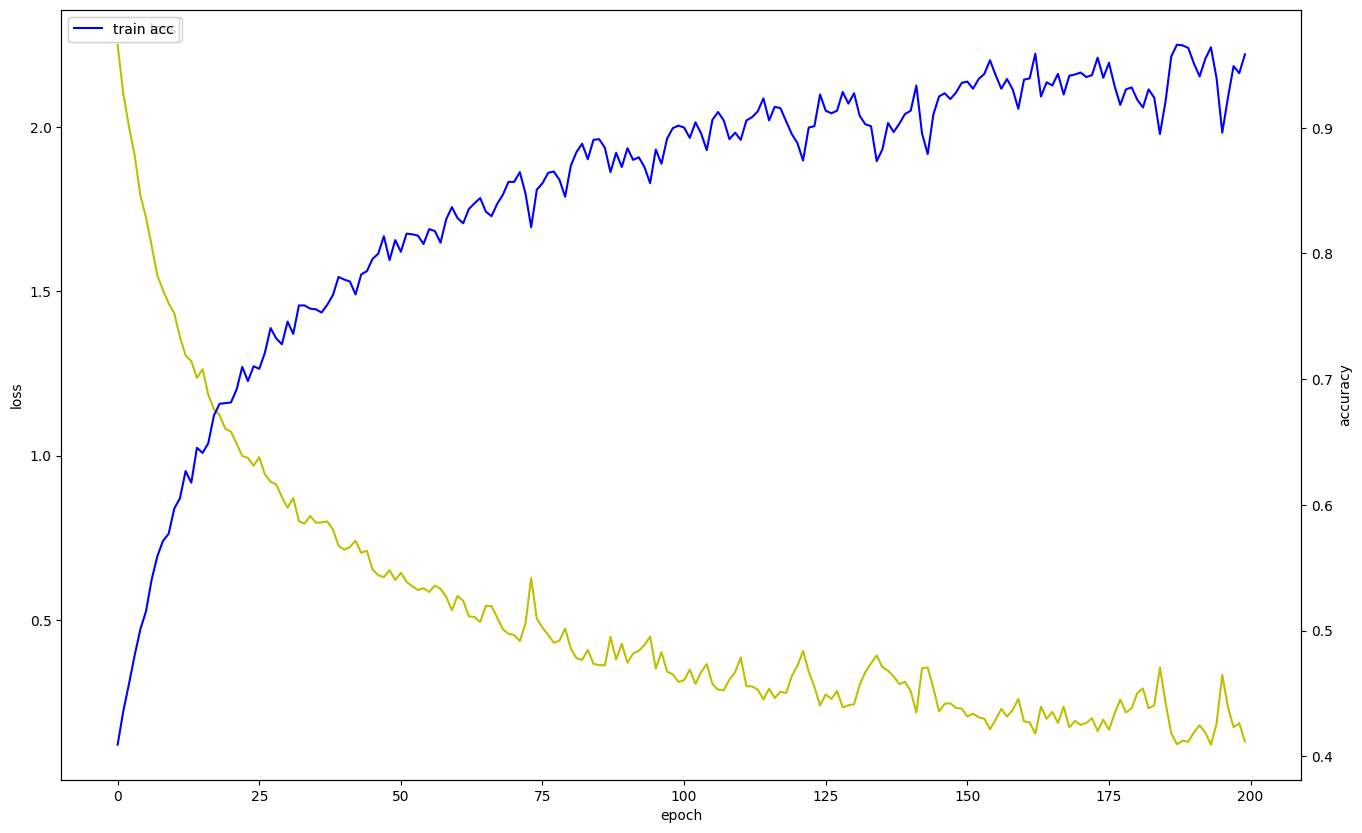

In [57]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots(figsize=(16, 10))
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
# loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['acc'], 'b', label='train acc')
# acc_ax.plot(history.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()

In [58]:
from sklearn.metrics import multilabel_confusion_matrix
from tensorflow.keras.models import load_model

model = load_model('models/sl_model_v2.h5')

# y_pred = model.predict(x_val)

# multilabel_confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))

In [61]:
import tensorflow as tf

# Convert the model
# converter = tf.lite.TFLiteConverter.from_saved_model('models/sl_model.h5') # path to the SavedModel directory
# tflite_model = converter.convert()

converter = tf.lite.TFLiteConverter.from_keras_model(model)

converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.experimental_new_converter=True
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS,
tf.lite.OpsSet.SELECT_TF_OPS]

tflite_model = converter.convert()

# Save the model.
with open('models/sl_model_v2.tflite', 'wb') as f:
  f.write(tflite_model)



In [79]:
# x_train[0]
test_x = np.load('test_data/seq_20231103_103839_석사연구실.npy')
print(*test_x)
# test_x = test_x.astype(np.float32)
# test_x = data[:, :-1]
# test_x.shape
# test_x = test_x.reshape(int(len(test_x)/1), 1, 265)
# y = model.predict(test_x)
# # # max(*y)
# # # len(y)
# # # for k in y[0]:
# # #     print(k)
# t = list(y[0])
# t
# idx = 0
# for i in range(len(t)):
#     if t[idx] < t[i]:
#         idx = i
# print(idx)
# actions[idx]

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  3.67500000e+01  2.51875000e+01  1.54625000e+02  1.89843750e+01
  1.29687500e+01  1.56875000e+02  8.67968750e+00  2.57031250e+01
  1.47750000e+02  1.97656250e+01  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00

In [80]:
# x_train[0]
test_x = np.load('test_data/seq_20231103_103347_석사.npy')
print(*test_x)
# test_x = test_x.astype(np.float32)
# test_x = data[:, :-1]
# test_x.shape
# test_x = test_x.reshape(int(len(test_x)/1), 1, 265)
# y = model.predict(test_x)
# # # max(*y)
# # # len(y)
# # # for k in y[0]:
# # #     print(k)
# t = list(y[0])
# t
# # idx = 0
# # for i in range(len(t)):
# #     if t[idx] < t[i]:
# #         idx = i
# # print(idx)
# # actions[idx]

[ 2.88650960e-01  4.54140574e-01 -9.20067151e-08  2.83450752e-01
  4.25085038e-01 -1.74491666e-02  2.90977776e-01  3.98849368e-01
 -2.57346518e-02  3.07855248e-01  3.90133023e-01 -3.17503959e-02
  3.21066618e-01  3.86762977e-01 -3.62901613e-02  3.10329705e-01
  3.78567129e-01 -2.22247373e-02  3.29251975e-01  3.51809084e-01
 -3.92986126e-02  3.44006181e-01  3.36510122e-01 -5.13615496e-02
  3.57950598e-01  3.23419809e-01 -5.99384643e-02  3.26524377e-01
  3.93446445e-01 -2.06778906e-02  3.36806953e-01  3.87588620e-01
 -4.03469354e-02  3.23700786e-01  4.03884083e-01 -4.61783521e-02
  3.12210709e-01  4.14488256e-01 -4.75531593e-02  3.37758005e-01
  4.10068482e-01 -2.15034410e-02  3.47380042e-01  4.07968313e-01
 -3.95072959e-02  3.36125463e-01  4.21923012e-01 -3.88631076e-02
  3.26398373e-01  4.30245042e-01 -3.53271961e-02  3.43842983e-01
  4.27265763e-01 -2.40988843e-02  3.51555705e-01  4.28783119e-01
 -3.74899395e-02  3.45076233e-01  4.37564820e-01 -3.83166708e-02
  3.37202847e-01  4.43119

In [81]:
# x_train[0]
test_x = np.load('dataset/seq_석사.npy')
print(*test_x)
# test_x = test_x.astype(np.float32)
# test_x = data[:, :-1]
# test_x.shape
# test_x = test_x.reshape(int(len(test_x)/1), 1, 265)
# y = model.predict(test_x)
# # # max(*y)
# # # len(y)
# # # for k in y[0]:
# # #     print(k)
# t = list(y[0])
# t
# # idx = 0
# # for i in range(len(t)):
# #     if t[idx] < t[i]:
# #         idx = i
# # print(idx)
# # actions[idx]

[ 5.63916922e-01  7.74336040e-01 -1.09869838e-07  5.36747575e-01
  7.90586054e-01  1.40353700e-03  5.24088025e-01  8.19655240e-01
 -4.98951529e-04  5.22607744e-01  8.49683344e-01 -3.52797564e-03
  5.26919246e-01  8.72393250e-01 -7.70782912e-03  5.27500868e-01
  8.30260754e-01 -4.21687355e-03  5.28936565e-01  8.69808912e-01
 -1.15855746e-02  5.33180952e-01  8.90372515e-01 -1.82225611e-02
  5.36883175e-01  9.06283855e-01 -2.24660020e-02  5.40813684e-01
  8.32938671e-01 -8.39645322e-03  5.42754412e-01  8.72340083e-01
 -1.31445341e-02  5.45106113e-01  8.97256017e-01 -1.75023936e-02
  5.47128260e-01  9.16067600e-01 -2.17691734e-02  5.54419100e-01
  8.33093047e-01 -1.25572449e-02  5.55865049e-01  8.67746770e-01
 -1.64430030e-02  5.56518435e-01  8.89227033e-01 -1.87917370e-02
  5.56774735e-01  9.06182647e-01 -2.14725751e-02  5.67006290e-01
  8.31241488e-01 -1.65757034e-02  5.70663333e-01  8.58005166e-01
 -1.98593121e-02  5.72552979e-01  8.74333680e-01 -2.03990396e-02
  5.74374557e-01  8.88303